<a href="https://colab.research.google.com/github/parhambarazesh/PET575/blob/master/Ex6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

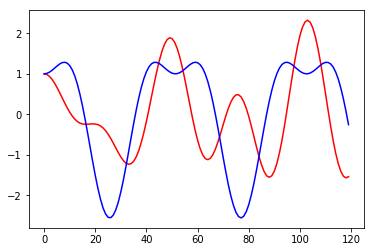

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

M=np.array([[2,0],[0,1]])
K=np.array([[9,-3],[-3,3]])

omega=3
omega=3/np.sqrt(2)
# omega=np.sqrt(6)

F0=np.array([0,2])

x0=2/((6-omega**2)*(3-2*omega**2))*np.array([[6],[2*(9-2*omega**2)]])/2
x0=np.array([1,1])
v0=np.array([0,0])

total=12

from scipy.linalg import eigh

w,Phi = eigh(K, M, eigvals_only=False)
Phi=-Phi
w=np.array([[w[0],0],[0,w[1]]])
w=np.sqrt(w)

M_B=np.matmul(np.matmul(Phi.transpose(),M),Phi)
K_B=np.matmul(np.matmul(Phi.transpose(),K),Phi)

diag=np.sqrt(K_B)
wd1=diag[0][0]
wd2=diag[1][1]
wd=np.array([wd1,wd2])

x0_n=np.matmul(np.linalg.inv(Phi),x0)
v0_n=np.matmul(np.linalg.inv(Phi),v0)

G_n=np.matmul(Phi.transpose(),F0)
A1=np.array([0,0])
A2=np.array([G_n[0]/(K_B[0][0]-omega**2),G_n[1]/(K_B[1][1]-omega**2)])

B=x0_n-A2
A=np.divide(v0_n,wd)

x1=[]
x2=[]

for i in np.arange(0,total,0.1):
    temp1=[Phi[0][0]*(B[0]*np.cos(wd[0]*i)+A2[0]*np.cos(omega*i))+Phi[0][1]*(B[1]*np.cos(wd[1]*i)+A2[1]*np.cos(omega*i))]
    x1=np.concatenate((x1,temp1),axis=0)
    #x1=[x1,temp1]
    #x1=[x1;temp1]
    temp2=[Phi[1][0]*(B[0]*np.cos(wd[0]*i)+A2[0]*np.cos(omega*i))+Phi[1][1]*(B[1]*np.cos(wd[1]*i)+A2[1]*np.cos(omega*i))]
    #x2=[x2;temp2]
    x2=np.concatenate((x2,temp2),axis=0)

plt.figure(1)
plt.plot(x1,'r')
plt.plot(x2,'b')